<a href="https://colab.research.google.com/github/mdnawabali/Play-Store-App-Review/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#**Title Of The Project-- "Exploratory Data Analysis on Google Play Store App"**
**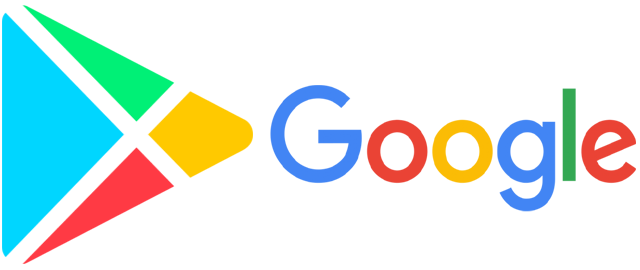**
###**We will conduct exploratory data analysis on the Google Play Store dataset for this project. Exploratory data analysis is nothing more than examining the provided data to look for patterns, trends, and assumptions. There are numerous attributes in this dataset including rating, review, size, installs, and many others.**

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Implementing a Dataset**

> First, let's import the necessary libraries.





In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



> The most widely used data visualisation libraries are matplotlib and seaborn.

> Now let's import the dataset using read_csv.





In [184]:
#import play store dataset
play_store_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA project on play store app/ Play Store Data.csv')
user_review=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA project on play store app/User Reviews.csv')



> Let's view the dataset



In [185]:
#The top five rows of the dataframe are shown by default when using Pandas .head function.
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up




> Now let's look at the shape of the DataFrame



In [186]:
print("There are {} rows and {} columns in the play store dataset.".format(play_store_df.shape[0],play_store_df.shape[1]))
print("There are {} rows and {} columns in the play store review dataset.".format(user_review.shape[0],user_review.shape[1]))

There are 10841 rows and 13 columns in the play store dataset.
There are 64295 rows and 5 columns in the play store review dataset.




> We can use the isnull() function to determine whether the dataset contains any missing values or Nan values.





In [187]:
play_store_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64



> In order to conduct exploratory data analysis on the dataset, we must first prepare it.





#**STEP 1:Cleaning the Data**
 
> Cleaning and converting raw data before processing and analysis is known as data preparation. Prior to processing, it is a crucial phase that frequently entails reformatting data, correcting data, and integrating data sets to enrich data. It involves determining which parts of the data are incomplete, incorrect, inaccurate, or irrelevant, and then replacing, changing, or deleting the soiled or coarse data.



> Wouldn't it be better if we could construct a function to obtain more valuable information about the various dataset attributes? There is also another good reason to define a function because it will be reusable and we will use it often in the future.



In [188]:
# Defining a function
def complete_info():
    null = pd.DataFrame(index=play_store_df.columns)
    null['data_type'] = play_store_df.dtypes
    null['null_count'] = play_store_df.isnull().sum()
    null['unique_count'] = play_store_df.nunique()
    return null

In [189]:
# Let’s call the function and see what it returns:
complete_info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


###App



> We can now begin the process of cleaning the data. Let's start with the column "App" and see if there are any duplicate values present.



In [190]:
print("Number of Unique App names = ", len(play_store_df['App'].unique()))
print("NUMBER of the Total App name = ", play_store_df.shape[0])
print("Duplicate Apps = ",len(play_store_df['App'])- len(play_store_df['App'].unique()))

Number of Unique App names =  9660
NUMBER of the Total App name =  10841
Duplicate Apps =  1181


In [191]:
#Examining the appearance of the duplicate value
play_store_df[play_store_df['App'] == 'Coloring book moana']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up




> Therefore, it is preferable to eliminate all duplicate values and keep the dataset clean.



In [192]:
play_store_df.drop_duplicates(subset = 'App', keep = 'first' ,inplace = True)

###Type

> We may now move on to the "Type" column:



In [193]:
# check for unique set of values in the column 'type'
play_store_df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)



> There is 0 and null value, let’s change them to free.



In [194]:
#changing the values to 'free'
play_store_df['Type'].replace(to_replace=['0'], value=['Free'],inplace=True)
play_store_df['Type'].fillna('Free', inplace=True)

###Content Rating

> We can now turn our attention to the column 'Content Rating'.



In [195]:
#checking for null values
play_store_df[play_store_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Free,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [196]:
#comparing the data with the nearby rows.
play_store_df.loc[10465:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Free,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up




> As can be seen from the command above, all of the current column values are being replaced with their previous columns in row 10472 due to a missing value in the category column.



In [197]:
#Dropping the row containing null values in the column 'Content Rating'
play_store_df.dropna(subset = ['Content Rating'], inplace=True)

In [198]:
complete_info()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,1463,39
Reviews,object,0,5330
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,118


###Rating

> The Rating column, which has a total of 1463 missing values, can now be fixed. Replacing the missing values with the Modevalue of that entire column.



In [199]:
#Finding the mode value and replacing with the null values present.
modeValueRating = play_store_df['Rating'].mode()
print(f' The mode value is: {modeValueRating[0]}')
play_store_df['Rating'].fillna(value=modeValueRating[0], inplace = True)
complete_info()

 The mode value is: 4.3


,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,5330
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,118




> We have a few unnecessary columns that won't be very helpful when we're doing the analysis. Let's eliminate those columns.



In [200]:
#Eliminatting the collumns that are not necessary.
play_store_df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [201]:
complete_info()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,5330
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,118


> The null count for every column is zero, indicating that there are no longer any missing entries in the data frame.

#**STEP 2: Preparing the Data**
> The datatype for columns like Reviews, Size, Installs, and price should be an int or float, but we can see that they are of object type here. Let's change them to the appropriate type.



###Reviews

In [202]:
#converting the column Reviews to type 'int'
play_store_df['Reviews'] = play_store_df.Reviews.astype(int)

###Size

> It also includes the values "Varies with device", 'M' and 'k' which are present in the column 'size' as string in the value type. The KB and MB size scales would be messed up if the 'M' and 'K' were left out. Consequently, we convert KBs to MBs. Below is a method of doing this.


In [203]:
#Removing the +Symbol:
play_store_df['Size'] = play_store_df.Size.apply(lambda x: x.strip('+'))

In [204]:
#Removing the , symbol:
play_store_df['Size'] = play_store_df.Size.apply(lambda x: x.replace(',', ''))

In [205]:
#removing M and k from values, also coverting KB into MB 
play_store_df['Size'] =play_store_df['Size'].apply(lambda x: x.replace('M', '') if 'M' in str(x) else x )
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(x.replace('k', ''))/1024 if 'k' in str(x) else x)

In [206]:
#Replacing the Varies with device value with Nan :
play_store_df['Size'] = play_store_df.Size.replace('Varies with device', np.NaN)



> We need to do something with the set of Nan values data since we converted the Varies with device value to Nan. Since some apps' sizes will be too huge and others excessively small, it would be best to remove the rows of the column Size that contain Nanvalues rather than attempt to replace them with mean or mode.



In [207]:
# Removing the rows which containing "Varies with device"
play_store_df.dropna(subset = ['Size'], inplace=True)

In [208]:
#Now, finally converting all these values to numeric type:
play_store_df['Size'] = pd.to_numeric(play_store_df['Size']) 

###Installs

In [209]:
#check for unique values
play_store_df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)



> I will now convert this column to a float. The "," value needs to be changed, and the "+" sign needs to be removed.




In [210]:
#Removing the "+" sign and changing the sign ","
play_store_df['Installs'] = play_store_df.Installs.apply(lambda x: x.strip('+'))
play_store_df['Installs'] = play_store_df.Installs.apply(lambda x: x.replace(',', ''))

In [211]:
#convert it from string type to numeric type,
play_store_df['Installs'] = pd.to_numeric(play_store_df['Installs'])

###Price


> So, now we are only left with the Price column



In [212]:
#checking for value count
play_store_df['Price'].value_counts()

0          7747
$0.99       142
$2.99       110
$1.99        66
$4.99        63
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 87, dtype: int64

In [213]:
#Removing "$" sign
play_store_df['Price'] = play_store_df.Price.apply(lambda x: x.strip('$'))

In [214]:
# converting to Numeric type
play_store_df['Price'] = pd.to_numeric(play_store_df['Price'])



> Lets take a final look at our DataFrame



In [215]:
#calling the function
complete_info()

,data_type,null_count,unique_count
App,object,0,8432
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4304
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,115


In [216]:
play_store_df.shape

(8432, 10)



> There are 8434 rows and 10 columns left in the data frame after the dataset has been cleaned up by removing any unneeded rows and columns containing Null Values and garbage data.



#**STEP 3: Exploratory Analysis and Visualization**

##Category




> Well, let us try to find what are the top categories in the play store, which contains the highest number of apps?



In [217]:
#unique categories
len(play_store_df['Category'].unique())

33



> So we got 33 category on this dataset, let’s see which one is the famous category



In [218]:
# Determining top categories in data
x = play_store_df['Category'].value_counts().index
y = play_store_df['Category'].value_counts()
xaxis = []
yaxis = []
for i in range(len(y)):
    xaxis.append(x[i])
    yaxis.append(y[i])

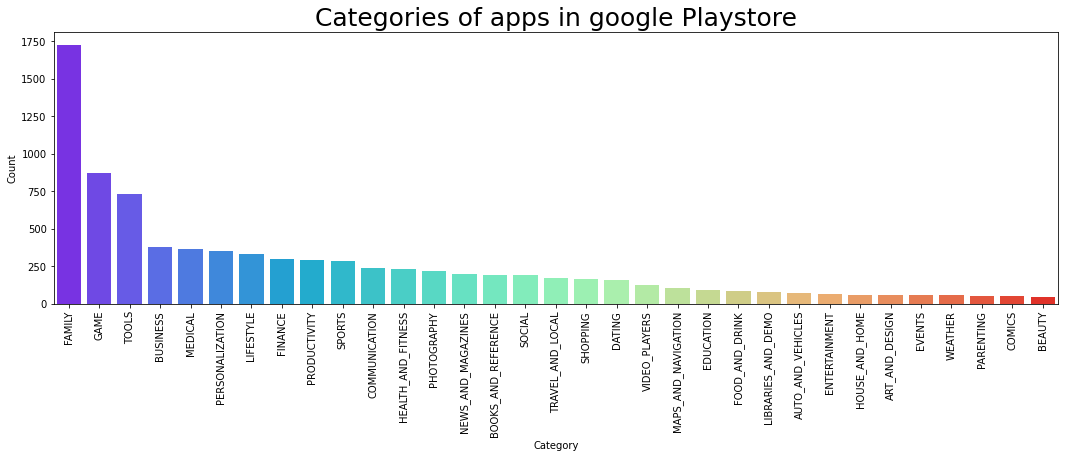

In [219]:
# Plotting graph/visuals for the same
plt.figure(figsize=(18,5))
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
category_graph = sns.barplot(x = xaxis, y = yaxis, palette= "rainbow")
category_graph.set_title("Categories of apps in google Playstore", fontsize = 25);



> There are a total of 33 categories in the dataset, and based on the result from the previous step, we can infer that the majority of the apps in the Google Play store fall into the Family & Games category, while the least number of them fall into the Beauty & Comics category.



In [220]:
#Finding the top 10 categories
Top10_categories=play_store_df['Category'].value_counts().reset_index().head(10)
Top10_categories.rename(columns={'index':'Category','Category':'Count'},inplace=True)
Top10_categories

,Category,Count
0,FAMILY,1726
1,GAME,873
2,TOOLS,731
3,BUSINESS,376
4,MEDICAL,368
5,PERSONALIZATION,351
6,LIFESTYLE,334
7,FINANCE,299
8,PRODUCTIVITY,291
9,SPORTS,285


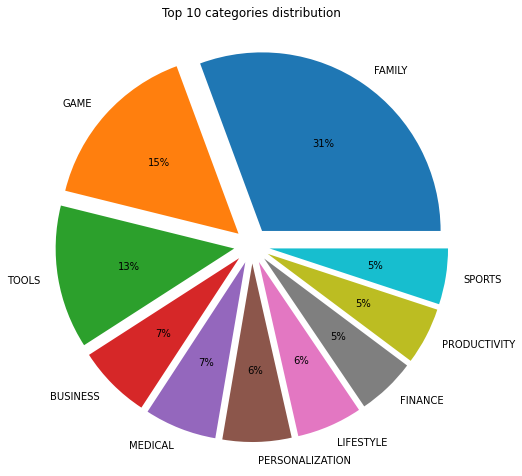

In [221]:
#Plotting Distribution of top 10 categories
plt.figure(figsize=(8,10))
plt.pie(Top10_categories['Count'],labels=Top10_categories['Category'],autopct='%.0f%%',explode=[0.1]*10)
plt.title('Top 10 categories distribution')
plt.show()



> Among Top 10 Categories Family(31%), Games (15%) And Tools(13%) Contribute The Most



## Rating

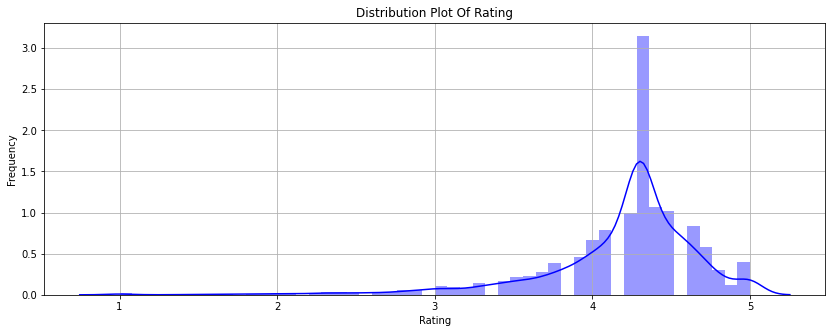

In [222]:
# ploting distribution graph for Rating
plt.figure(figsize=(14,5))
sns.distplot(play_store_df['Rating'],color = 'blue')
plt.grid()
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title('Distribution Plot Of Rating')
plt.show()

In [260]:
#calculating the average rating
print('The average rating in the playstore is',play_store_df['Rating'].mean())

The average rating in the playstore is 4.18384724857685




> This average rating infers that maximum number of apps in playstore have been rated above 4 which signifies majority of apps available in playstore are of high calibre.  



In [224]:
#App's With 5 Star Rating
five_star_rating_apps=play_store_df[play_store_df['Rating']==5]
five_star_rating_apps['App'].nunique()

266

In [225]:
#Top 10 Categories Of 5 Star Rating App's
five_star_rating_apps['Category'].value_counts().reset_index().rename(columns={'index':'Category','Category':'Count'}).head(10)

,Category,Count
0,FAMILY,65
1,LIFESTYLE,29
2,MEDICAL,25
3,BUSINESS,18
4,TOOLS,17
5,GAME,12
6,HEALTH_AND_FITNESS,12
7,PERSONALIZATION,10
8,SOCIAL,8
9,PRODUCTIVITY,8


## Content Rating


> Let us see, which category of Apps from the ‘Content Rating’ column is found more on the play store.



In [226]:
#Content rating value counts
value_c=play_store_df["Content Rating"].value_counts().reset_index()

Text(0.5, 1.0, 'Barplot of Content Rating ')

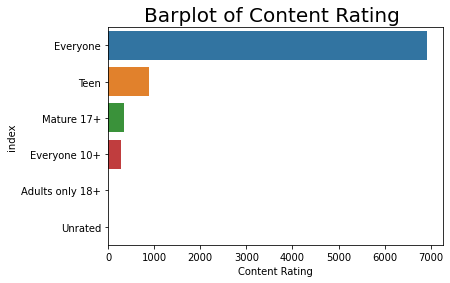

In [227]:
#barplot of content rating value counts
sns.barplot(x="Content Rating",y="index",data=value_c)
plt.title("Barplot of Content Rating ",fontsize=20)



> The Everyone category has the most apps, as can be seen from the plot above.



##Categories Of Type-'Free' And 'Paid'


> Paid apps vs Free apps




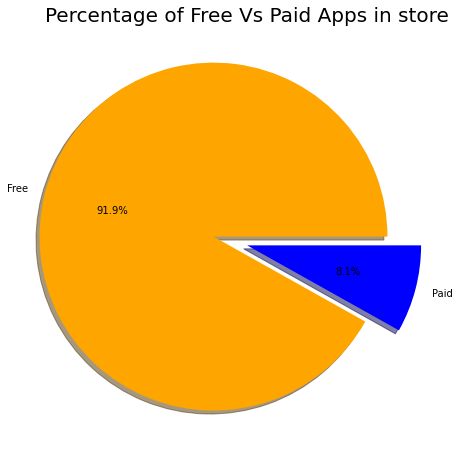

In [228]:
#plotting a graph between free and paid apps
plt.figure(figsize=(8,8))
labels = play_store_df['Type'].value_counts(sort = True).index
sizes = play_store_df['Type'].value_counts(sort = True)
colors = ["orange","blue"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percentage of Free Vs Paid Apps in store',size = 20)
plt.show()



>We can see from the graph above that 92%  of the apps in the Google Play store are free, while 8%  are paid.



##Installs


> Let us check, which category App’s have the most number of installs?



In [229]:
# defining x
x = play_store_df.groupby('Category')['Installs'].agg(np.sum)

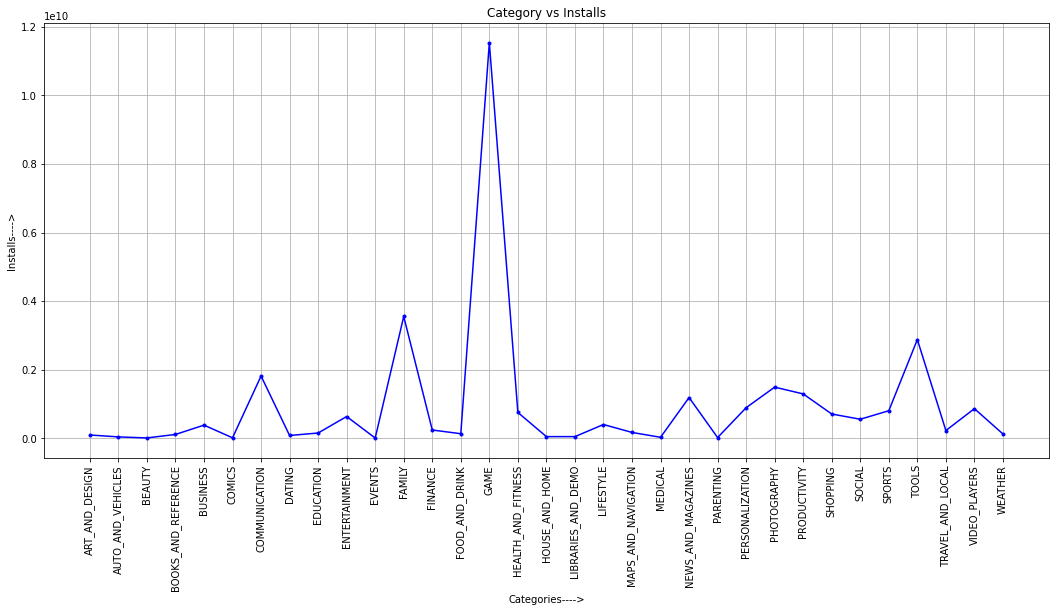

In [230]:
# plotting line graph to determine category highest installations
plt.figure(figsize=(18,8))
plt.plot(x ,  color='blue', marker='.')
plt.xticks(rotation=90)
plt.xlabel('Categories---->')
plt.ylabel('Installs---->')
plt.title('Category vs Installs')
plt.grid()
plt.show()



> Graph clearly shows that apps in game category have been installed the highest followed by apps in family category and then apps in travel and local.



In [231]:
# top 10 install app based on category
def top10incategory_installs(str):
    str = str.upper()
    top10 = play_store_df[play_store_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');



> After we are done with defining the function, it’s time to check and see if everything is working fine. So let’s test it by passing Game category to the above-defined function.



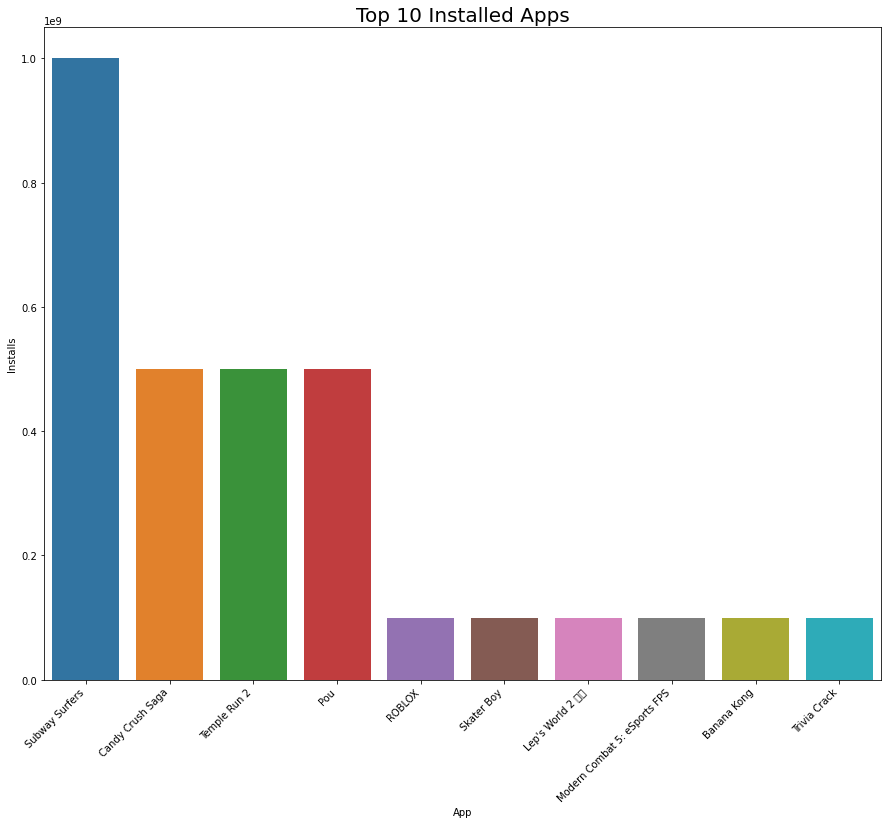

In [263]:
#calling the function
top10incategory_installs('Game')



> Subway Surfers has the most instals in the Game category, as shown in the graph above. In the same way, we can obtain the top 10 installed apps by passing various category names to the function.



##Price


> Let us Visualize, which are the top 10 expensive Apps in the play store?



In [233]:
# We will again need to create a separate data frame.
top10PaidApps_df = play_store_df[play_store_df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)

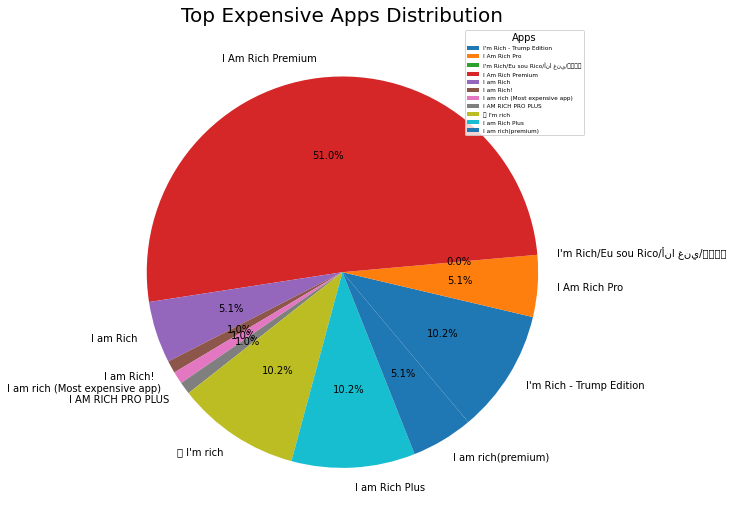

In [270]:
#ploting the top 10 expensive App
plt.figure(figsize=(12,9));
plt.pie(top10PaidApps_df.Installs, explode=None, labels=top10PaidApps_df.App, autopct='%1.1f%%', startangle= -50);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps_df.App, 
           loc="top left",
           title="Apps",
           fontsize = "xx-small"
          );



> From the above graph, we can interpret that the App 'I am rich Premium' is the most expensive app in the google play store followed by 'I am Rich'.



In [235]:
#Discription of feature Price
print('The mean price of an App in playstore is',play_store_df['Price'].mean())
print('The maximum price of an App in playstore is',play_store_df['Price'].max())
play_store_df['Price'].describe()

The mean price of an App in playstore is 1.2259724857685008
The maximum price of an App in playstore is 400.0


count    8432.000000
mean        1.225972
std        18.028685
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

##Size



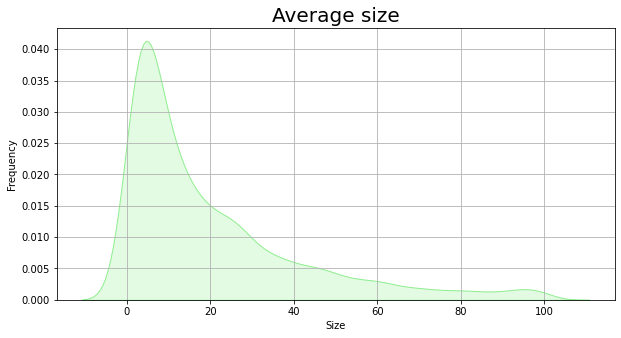

In [236]:
# Plotting a line graph to determine size distribution
plt.figure(figsize=(10,5))
plt.xlabel("Size")
plt.ylabel("Frequency")
plt.grid()
size_distribution_graph = sns.kdeplot(play_store_df.Size, color="lightgreen", shade = True)
plt.title('Average size',size = 20);

In [237]:
print('The median size of an App in playstore is',play_store_df['Size'].median())
print('The maximum size of an App in playstore is',play_store_df['Size'].max())

The median size of an App in playstore is 12.0
The maximum size of an App in playstore is 100.0


###Rating


> Apps With Highest Ratings



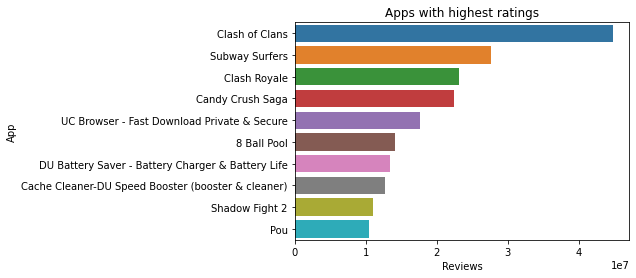

In [238]:
Apps_and_reviews= play_store_df.groupby('App')[['Reviews']].mean().sort_values('Reviews', ascending=False).head(10).reset_index()
sns.barplot(y = Apps_and_reviews['App'], x = Apps_and_reviews['Reviews'])
plt.title('Apps with highest ratings')
plt.show()

In [239]:
print("Number of Apps with more than 1M reviews",play_store_df[play_store_df['Reviews'] > 1000000].shape[0])
print("\nTop 20 apps with most reviews: \n",play_store_df[play_store_df['Reviews'] > 1000000].sort_values(by = 'Reviews', ascending = False).head(20)['App'])

Number of Apps with more than 1M reviews 179

Top 20 apps with most reviews: 
 1670                                       Clash of Clans
1654                                       Subway Surfers
1660                                         Clash Royale
1655                                     Candy Crush Saga
378           UC Browser - Fast Download Private & Secure
1675                                          8 Ball Pool
8896    DU Battery Saver - Battery Charger & Battery Life
3239    Cache Cleaner-DU Speed Booster (booster & clea...
1932                                       Shadow Fight 2
1662                                                  Pou
1764                                           Pokémon GO
1893                                              Yes day
3975                                              Hay Day
1739                             Dream League Soccer 2018
1697                                    My Talking Angela
4688               VivaVideo - Video Editor & Photo

##Genres

In [240]:
#top 10 Genres Value Counts
genres_count=play_store_df['Genres'].value_counts().reset_index()
genres_count.rename(columns={'index':'Genres','Genres':'count'},inplace=True)
top_10_genres=genres_count.head(10)

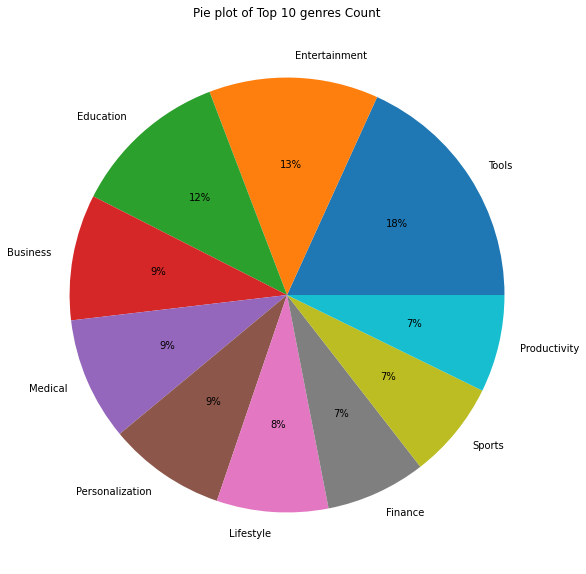

In [241]:
#Pie plot of Top 15 genres Count
plt.rcParams['figure.figsize'] = (20, 10)
plt.pie(top_10_genres['count'],labels=top_10_genres['Genres'],autopct='%.0f%%')
plt.title('Pie plot of Top 10 genres Count')
plt.grid()
plt.show()



> Tools is the most used genre in apps.



##Correlation Heatmap

In [242]:
#Correlation
play_store_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.061297,0.045540,0.040475,-0.018721
Reviews,0.061297,1.000000,0.179321,0.597289,-0.008649
Size,0.045540,0.179321,1.000000,0.134291,-0.022441
Installs,0.040475,0.597289,0.134291,1.000000,-0.010148
Price,-0.018721,-0.008649,-0.022441,-0.010148,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

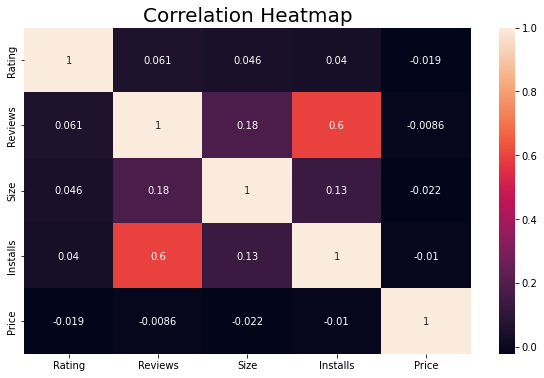

In [243]:
#Correlation Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(play_store_df.corr(), annot= True)
plt.title("Correlation Heatmap",fontsize=20)

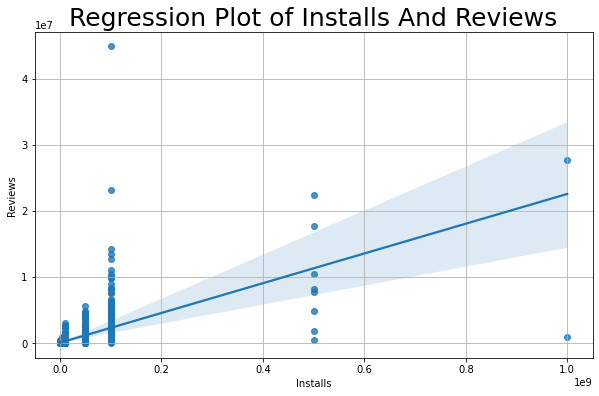

In [244]:
#Regression Plot Of Installs And Reviews
plt.figure(figsize = (10,6))
sns.regplot(x="Installs",y="Reviews",data=play_store_df)
plt.title("Regression Plot of Installs And Reviews",fontsize=25)
plt.grid()



> There is some significant amount of positive correlation between Installs and Reviews. This is expected as no. of Installs increases more interactions will happen which leads to increasing no. of Reviews.



#**STEP 4: Let's Drive Into The User Reviews Data**

In [245]:
#First Look Of User Reviews Data
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [246]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


##Handling missing values

In [247]:
#data of Translated null values
user_review[user_review['Translated_Review'].isnull()].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


In [248]:
#Dropping Nulls of Translated Review as all other feature values are also null 
user_review.dropna(subset=['Translated_Review'],inplace=True)

In [249]:
#Checking data after removing nulls
user_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


##Combining Both Dataset

In [250]:
#unique apps is user_reviews_data
user_review['App'].nunique()

865

In [251]:
#unique apps is play_store_data
play_store_df['App'].nunique()

8432

In [252]:
#Merging both data
combined_data=pd.merge(play_store_df,user_review, on='App')

In [253]:
#Unique Apps in combined data
combined_data['App'].nunique()

568

In [254]:
#About combined data
combined_data.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

##Analysis Of Combined Data







###Sentiment

In [256]:
#Sentiment count
sentiment_count= combined_data.Sentiment.value_counts().reset_index().rename(columns={'index':'Sentiment','Sentiment':'count'})
sentiment_count

,Sentiment,count
0,Positive,15401
1,Negative,5392
2,Neutral,3276


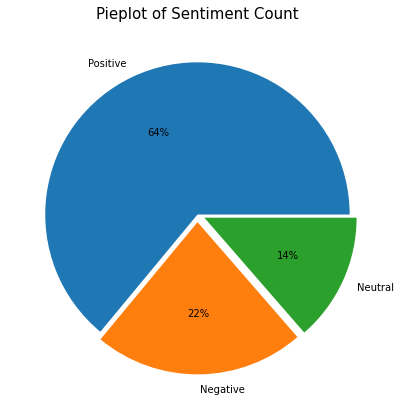

In [257]:
#Pieplot of Sentiment Count
plt.rcParams['figure.figsize'] = (15, 7)
plt.pie(sentiment_count['count'],labels=sentiment_count['Sentiment'],autopct='%.0f%%',explode=(0,0.05,0.05))
plt.title('Pieplot of Sentiment Count',size=15)
plt.show()



> This chart interprets that most of the reviews are positive.



In [258]:
#Categoriwise Sentiment Count
categoriwise_sentiment_count=combined_data.groupby(['Category','Sentiment'])['Sentiment'].count().reset_index(name='count')
categoriwise_sentiment_count.head()

,Category,Sentiment,count
0,ART_AND_DESIGN,Negative,58
1,ART_AND_DESIGN,Neutral,54
2,ART_AND_DESIGN,Positive,233
3,AUTO_AND_VEHICLES,Negative,11
4,AUTO_AND_VEHICLES,Neutral,20


Text(0.5, 1.0, 'Category-wise sentiment count')

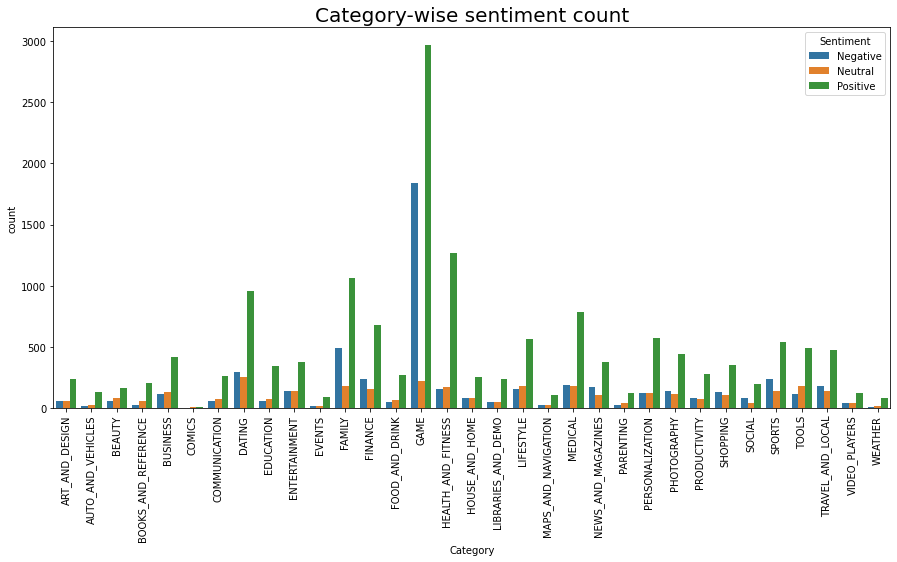

In [259]:
#Barplot of categoriwise_sentiment_count
sns.barplot(x="Category", y="count", hue="Sentiment", data=categoriwise_sentiment_count)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("Category-wise sentiment count",fontsize=20)